In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv(r"C:\Users\M.ARUN\Downloads\train.csv")

In [4]:

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:

df =  data[['FullBath','BedroomAbvGr','SalePrice','GrLivArea']]
df.head()

,FullBath,BedroomAbvGr,SalePrice,GrLivArea
0,2,3,208500,1710
1,2,3,181500,1262
2,2,3,223500,1786
3,1,3,140000,1717
4,2,4,250000,2198


<Axes: >

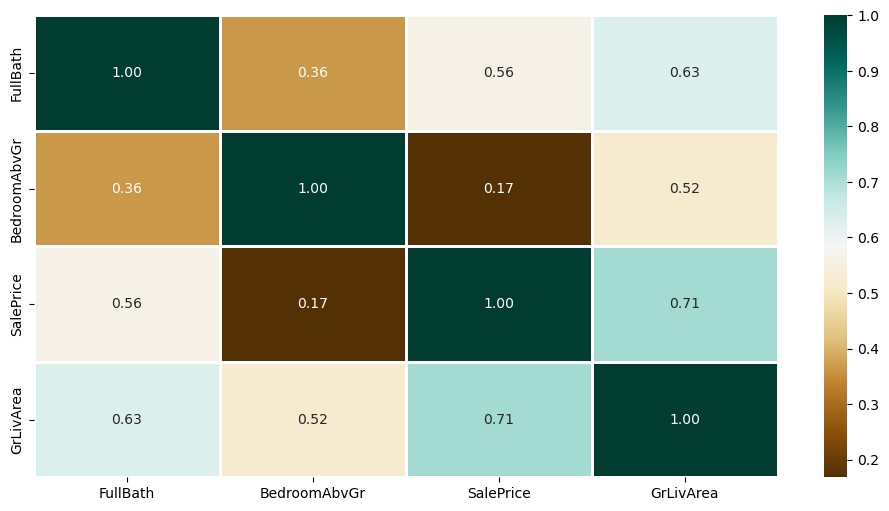

In [6]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

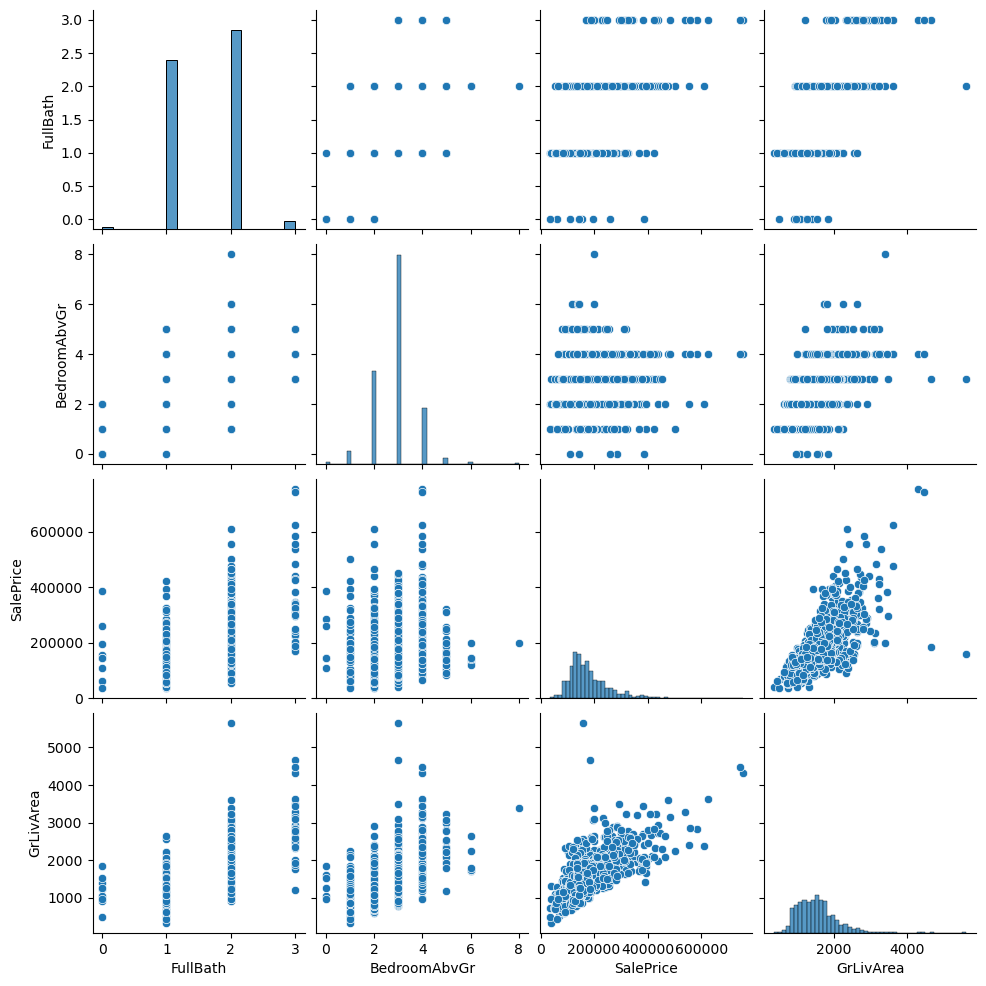

In [7]:

sns.pairplot(df)

<BarContainer object of 1460 artists>

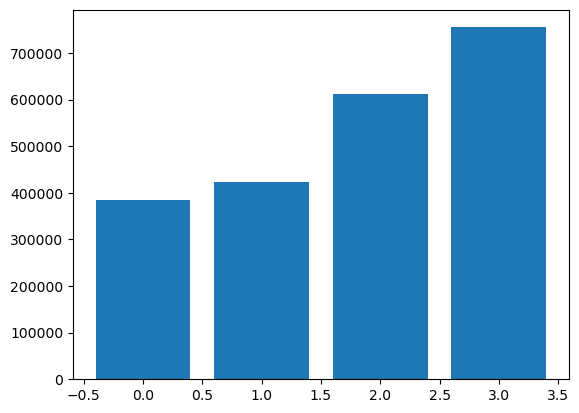

In [8]:

plt.bar(data['FullBath'],data['SalePrice'])

<BarContainer object of 1460 artists>

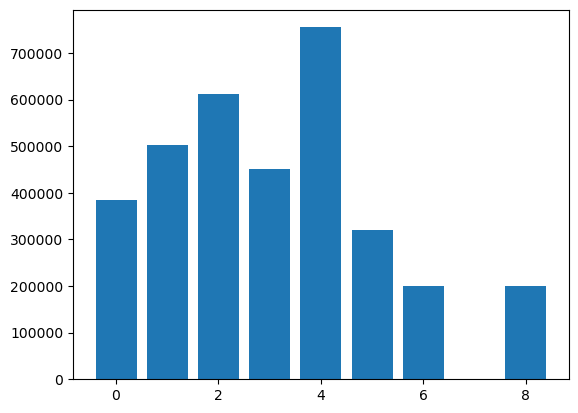

In [9]:
plt.bar(data['BedroomAbvGr'],data['SalePrice'])


<BarContainer object of 1460 artists>

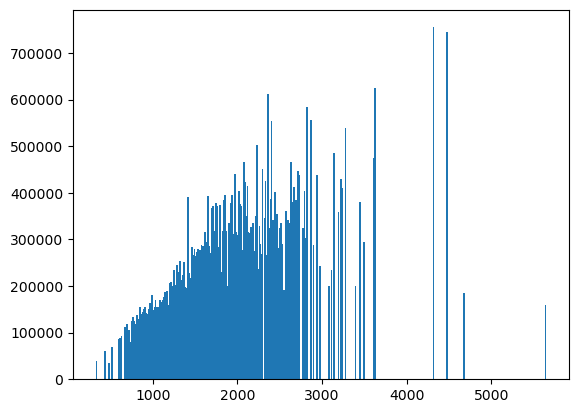

In [10]:
plt.bar(data['GrLivArea'],data['SalePrice'],width= 20)

<Axes: xlabel='SalePrice', ylabel='Density'>

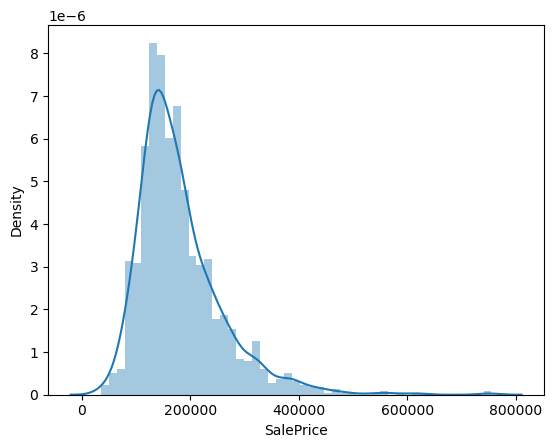

In [11]:

sns.distplot(data['SalePrice'])


In [12]:
x =data[["GrLivArea","BedroomAbvGr","FullBath"]]
y = data.iloc[:,-1]

In [13]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [14]:

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df


,Coefficient
GrLivArea,117.687820
BedroomAbvGr,-29790.786540
FullBath,24980.234307


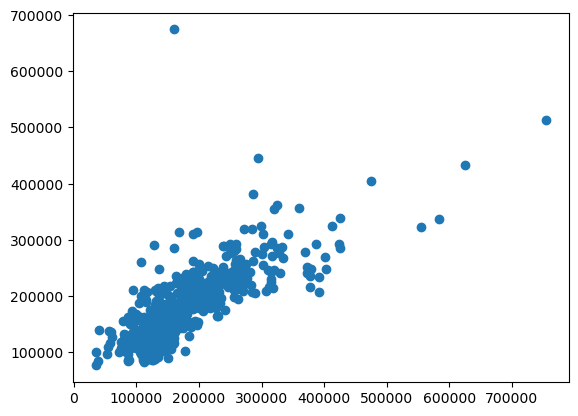

In [16]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)


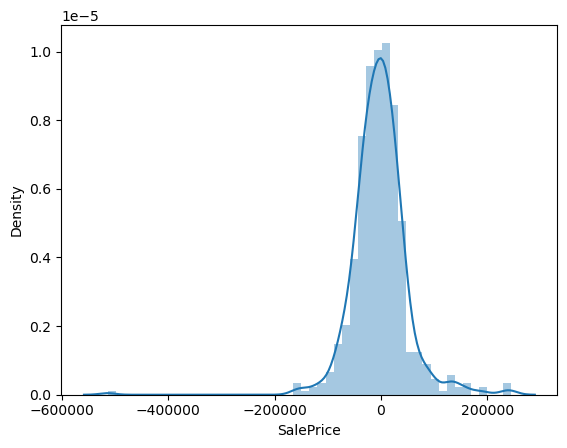

In [17]:
sns.distplot((y_test-y_pred),bins=50);

In [24]:
 metrics.mean_absolute_error(y_test, y_pred)

35095.79291480445

In [25]:
metrics.mean_squared_error(y_test, y_pred)

2795485563.0618753

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

52872.35159383281

In [19]:

test=pd.read_csv(r"C:\Users\M.ARUN\Downloads\test.csv")
X_test=test[["GrLivArea","BedroomAbvGr","FullBath"]]


In [20]:

Y_preds=lm.predict(X_test)
y=pd.DataFrame(Y_preds)

In [22]:
Y_preds

array([120539.31271059, 141707.35212202, 201993.93235361, ...,
        99559.34450834,  99457.42483203, 245656.11348059])